In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

**Importing the dataset**

In [48]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\Data sets\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
df.shape

(400, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [51]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [52]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [53]:
df.drop("User ID",axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [54]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [56]:
scaler = StandardScaler()
model = scaler.fit(X_train)
model1=scaler.fit(X_test)
X_train= model.transform(X_train)
X_test=model.transform(X_test)

**Fitting Random Forest to the Training set**

In [60]:
model2=RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
model.score(X_test,y_test)

0.8625

**Predicting the Test set results**

In [63]:
y_pred=model2.predict(X_test)

**Making the Confusion Matrix**

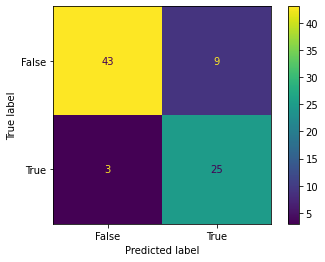

In [65]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Visualising the Training set results**

In [67]:
predicted=model2.predict(X_test)
predicted1=model2.predict(X_train)
df1=pd.DataFrame(X_train,columns=["Gender","Age","EstimatedSalary"])
df2=pd.DataFrame(y_train,columns=["Purchased"])
d_predict=pd.DataFrame(predicted1,columns=["A"])
d_predict1=pd.DataFrame(predicted,columns=["A"])

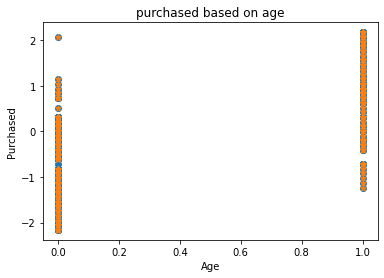

In [68]:
plt.scatter(df2["Purchased"],df1['Age'])
plt.scatter(d_predict["A"],df1['Age'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")
plt.show()

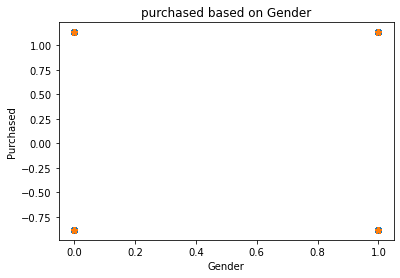

In [69]:
plt.scatter(df2["Purchased"],df1['Gender'])
plt.scatter(d_predict["A"],df1['Gender'],marker="*")
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.title("purchased based on Gender")
plt.show()

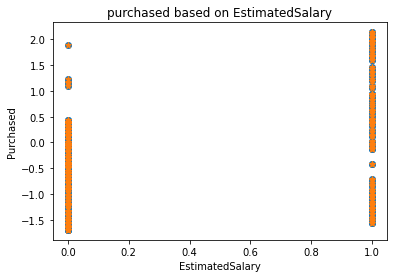

In [70]:
plt.scatter(df2["Purchased"],df1['EstimatedSalary'])
plt.scatter(d_predict["A"],df1['EstimatedSalary'],marker="*")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.title("purchased based on EstimatedSalary")
plt.show()


**Visualising the Test set results**

In [73]:
df3=pd.DataFrame(X_test,columns=["Gender","Age","EstimatedSalary"])
df4=pd.DataFrame(y_test)

Text(0.5, 1.0, 'purchased based on age')

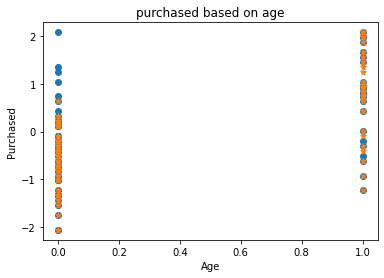

In [74]:
plt.scatter(df4,df3['Age'])
plt.scatter(d_predict1["A"],df3['Age'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")

Text(0.5, 1.0, 'purchased based on gender')

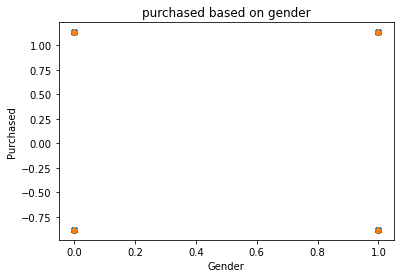

In [75]:
plt.scatter(df4,df3['Gender'])
plt.scatter(d_predict1["A"],df3['Gender'],marker="*")
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.title("purchased based on gender")

Text(0.5, 1.0, 'purchased based on age')

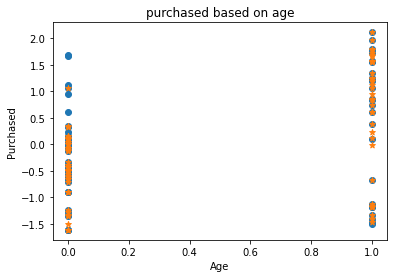

In [76]:
plt.scatter(df4,df3['EstimatedSalary'])
plt.scatter(d_predict1["A"],df3['EstimatedSalary'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")

The Random forest classification perform a score of 88% without hyperparameter tuning and the prediction on the train and test are almost the same and you can see the visualize for best understanding